## 도미 데이터 산점도

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
                500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
                714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]


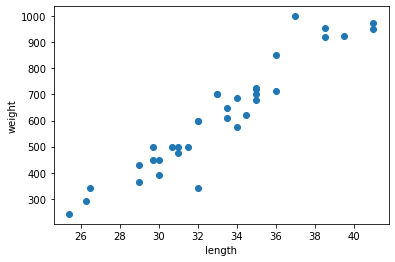

In [6]:
import matplotlib.pyplot as plt

plt.scatter(bream_length,bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 상관관계 선형성이 있는지 확인 -> 피어슨 상관계수
# 순서간  -> 스피어만의 상관계수 / 켄달
# 통계 / 시각화를 같이 보는 이유는 목적에 따라 상관관계를 파악하기 위해서

## 도미 데이터와 빙어 데이터 병합한 산점도

In [7]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

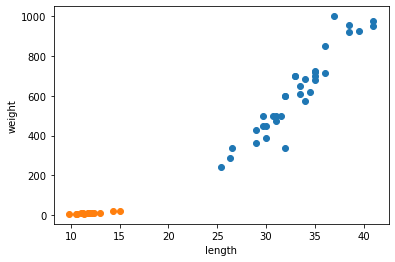

In [8]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 첫 번째 머신러닝 프로그램

### 두 생성 데이터 병합

In [9]:
# 두 리스트 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [10]:
# 2차원 리스트로 변환

fish_data= [[l,w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


## target(label) 데이터 생성

In [12]:
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## K-최근접 이웃 (K-Nearest Neighbor)알고리즘을 이용한 분류

- 테스트 데이터와 k개 훈련데이터의 y값들을 비교
- 분류와 회귀 모두 활용
    - 분류 : k개 최근접 이웃들의 class들 중 <b>다수결</b> 결과로 class 예측
    - 회귀 : k개 최근접 이웃들이 가지고 있는 값의 <b>평균</b>을 결과값으로 예측
    - 비모수방식이며 instance-based 알고리즘
    
 


### 사이킷런의 k-최근접이웃 클래스

In [14]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClass 객체 생성

In [15]:
kn = KNeighborsClassifier()

훈련(training) : fit(features, label)메서드

In [16]:
kn.fit(fish_data,fish_target)

KNeighborsClassifier()

모델 평가 : score()메서드 => 분류 : 정확도 / 회귀 : mse

In [18]:
kn.score(fish_data,fish_target)

1.0

정확도(accuracy)
- 정확한 답을 몇개 맞추었는지를 백분율로 나타낸다
- 정확히 맞힌개수 / 전체 데이터 수

K-최근접 이웃 알고리즘을 이용한 새로운 데이터 분류

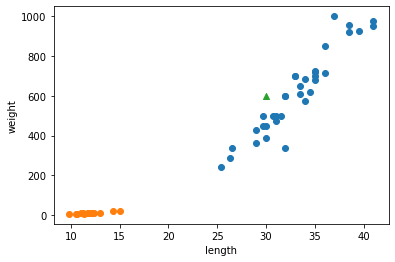

In [19]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(30, 600, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
kn.predict([[30, 600],[50,550],[5,20]])

array([1, 1, 0])

_fit_X 속성 : fish_data를 가지고 있음

In [24]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


_y 속성 : fish_target을 가지고 있음

In [25]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


K-neighbors 크기 지정

In [27]:
# 기본 : n_neighbors=5
kn49 = KNeighborsClassifier(n_neighbors=49)

k=49인 경우 모델 훈련 및 성능

In [28]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

#### 확인 문제

In [29]:
Kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
for k in range(5,50):
    # 최근접 이웃 개수 설정
    kn.n_neighbors=k
    # 점수 계산
    score = kn.score(fish_data,fish_target)
    if score < 1:
        print(k,score)
        break

18 0.9795918367346939


## Data Split과 모델 검증
학습에 사용되지 않은 데이터를 사용하여 예측을 수행함으로써 모델의 일반적인 성능에 대한 적절한 예측을 함

- 홀드-아웃
- 교차검증
- 필요에 따라 stratified Sampling

- 홀드-아웃 방식
train-validation-Test로 나누기도 한다

훈련 데이터셋과 테스트 데이터셋으로 분리

In [30]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

학습 및 평가

In [32]:
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

0.0

## 왜? 성능이 0.0일까?

편향(biased)된 데이터 셋 구성 때문에
- 샘플링 편향(sampling Bias)

훈련된 데이터는 도미인데 테스트는 빙어(인덱스로 분리하는건 무리)

## 올바른 훈련데이터와 테스트데이터 구성하기

In [35]:
import numpy as np

In [36]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [38]:
print(input_arr.shape)

(49, 2)


데이터 섞기(shuffling)
- 인덱스를 랜덤하기 섞고 분류하기

- random.seed()
    - 난수를 생성하기 위한 초기값 지정
    - seed를 지정하면 랜덤함수의 결과를 동일하게 재현할 수 있음

In [101]:
np.random.seed(42)
index=np.arange(49)
print(index)
np.random.shuffle(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [102]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [103]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [104]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

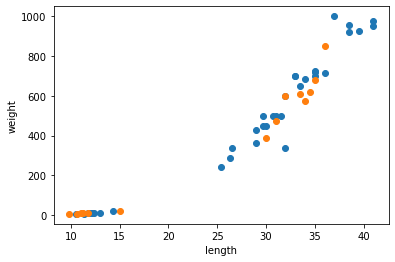

In [105]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 두 번째 머신러닝 프로그램

In [106]:
Kn = KNeighborsClassifier()

In [107]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [108]:
kn.score(test_input, test_target)

1.0

In [109]:
print(test_input)

[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]


In [110]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [111]:
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


# 데이터 전처리  

## 넘파이로 데이터 준비하기

In [73]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [74]:
import numpy as np

두 리스트 열방향으로 합치기 : 2차원 배열(tuple형태) == zip과 같은 역할

In [75]:
fish_data = np.column_stack((fish_length,fish_weight))

In [76]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


라벨 데이터

In [77]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

In [78]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련 데이터와 테스트 데이터 나누기

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
train_input, test_input, train_target,test_target = \
train_test_split(fish_data,fish_target, random_state=42) # seed값 42

In [87]:
test_input.shape

(13, 2)

In [88]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

데이터 분포를 반영한 분할

In [89]:
train_input, test_input, train_target,test_target = \
train_test_split(fish_data,fish_target, stratify=fish_target # 분포
                 ,random_state=42) # seed값 42

In [90]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

## 성능 평가 및 테스트

In [92]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

### 도미 데이터 : 길이 25, 무게 150에 대한 분류 결과는?

In [112]:
print(kn.predict([[25,150]]))

[0]


테스트할 도미 데이터를 포함한 산점도

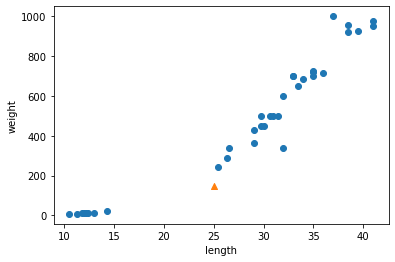

In [113]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

테스트할 도미데이터와 이웃하는 데이터들

In [115]:
dist, idx = kn.kneighbors([[25,150]])

In [116]:
print(dist)

[[ 92.00086956 130.73859415 137.17988191 138.32150953 138.39320793]]


In [117]:
print(idx)

[[25  2  1 18  3]]


In [119]:
train_input[idx]

array([[[ 25.4, 242. ],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

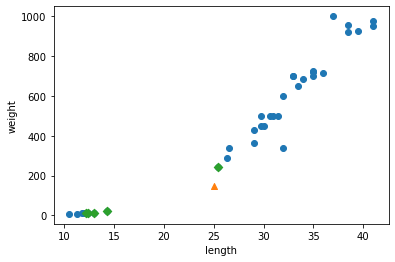

In [120]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[idx,0],train_input[idx,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [121]:
print(train_target[idx])

[[1 0 0 0 0]]


In [122]:
print(dist)

[[ 92.00086956 130.73859415 137.17988191 138.32150953 138.39320793]]


## 기준을 맞춰라 (단위맞추기=Scaliling)

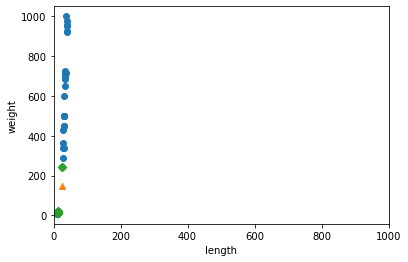

In [123]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[idx,0],train_input[idx,1],marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 최근접이웃 알고리즘은 거리를 기반으로 가까운 이웃을 결정
- 거리 계산 시 자료의 값이 큰 변수에 더 큰 영향을 받게 됨

## 두 변수의 스케일을 갖게
- 표준 점수(Z-score) = 정규화

In [125]:
mean = np.mean(train_input,axis=0)
print(mean)

[ 28.29428571 483.35714286]


In [126]:
std = np.std(train_input,axis=0)
print(std)

[  9.54606704 323.47456715]


In [128]:
train_scaled = (train_input-mean)/std # 정규화 과정
print(train_scaled[:10])

[[ 0.38819278 -0.44317902]
 [-1.66500881 -1.45284109]
 [-1.46597396 -1.43336506]
 [-1.68595985 -1.45655081]
 [ 0.49294796  0.66973691]
 [ 0.80721351  0.71301697]
 [ 0.70245833  0.73156557]
 [ 0.70245833  0.74702274]
 [ 1.06910147  1.45805236]
 [ 0.54532555  0.51516525]]


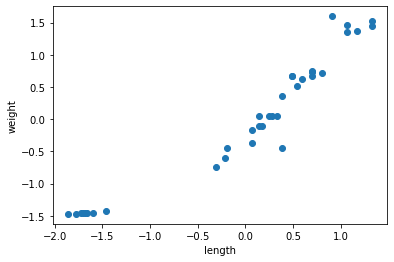

In [129]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

테스트 데이터도 스케일링

In [139]:
new = ([25,150]-mean)/std
print(new)

[-0.3450935  -1.03055132]


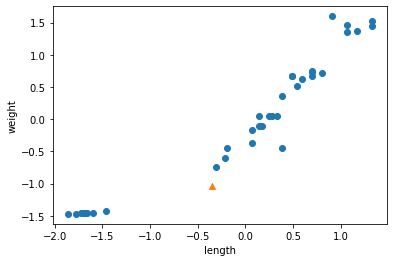

In [140]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [141]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [142]:
# test scaled
test_scaled = (test_input - mean) / std

In [143]:
kn.score(test_scaled, test_target)

1.0

In [144]:
# 도미로 예측
kn.predict([new])

array([1])

In [147]:
dist, idx = kn.kneighbors([new])

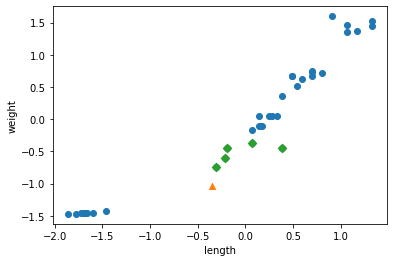

In [149]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[idx,0], train_scaled[idx,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

---

## 사이킷런을 이용한 머신러닝(Iris Dataset)

In [195]:
# 사이킷런 버전 확인
import sklearn
print(sklearn.__version__)

0.24.2


붓꽃 예측을 위한 사이킷런 필요 모듈 로딩

In [196]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

데이터 세트 로딩

In [197]:
import pandas as pd

iris = load_iris()
iris_data = iris.data
print(iris_data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [198]:
# iris.target은 붓꽃 결정 값

iris_label = iris.target
print(iris_label)
print(iris.target_names)
print(iris.feature_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [199]:
# 붓꽃 데이터 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [200]:
################## 참고 ##################

In [202]:
iris_df2 = iris_df[:]

In [203]:
def addName(x):
    if x.label == 0 :
        return iris.target_names[0]
    elif x.label == 1 :
        return iris.target_names[1]
    else:
        return iris.target_names[2]

iris_df2['label_name'] = iris_df2.apply(addName,axis=1)

C:\ananconda\envs\multi\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [206]:
iris_df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### 학습 데이터와 테스트 데이터 세트로 분리

In [209]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                    test_size=0.3, 
                                                    random_state=11)

In [211]:
# 학습용 피처 데이터 세트
X_train[:10]

array([[5.1, 2.5, 3. , 1.1],
       [6.6, 2.9, 4.6, 1.3],
       [5. , 3.2, 1.2, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [5.1, 3.8, 1.6, 0.2],
       [6.8, 3.2, 5.9, 2.3],
       [6.9, 3.1, 5.1, 2.3],
       [5.9, 3. , 4.2, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.7, 3.1, 4.7, 1.5]])

In [212]:
# 테스트용 피처 데이터 세트
X_test[:10]

array([[6.8, 3. , 5.5, 2.1],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.8, 5.1, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [6.4, 2.7, 5.3, 1.9],
       [4.9, 3.1, 1.5, 0.1],
       [6.7, 3.1, 4.4, 1.4],
       [5.7, 4.4, 1.5, 0.4],
       [4.8, 3.1, 1.6, 0.2],
       [6.1, 2.9, 4.7, 1.4]])

In [213]:
# 학습용 레이블 데이터 세트
y_train[:10]

array([1, 1, 0, 2, 0, 2, 2, 1, 2, 1])

In [214]:
# 테스트용 레이블 데이터 세트
y_test[:10]

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1])

In [216]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습수행
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

테스트 데이터 세트로 예측(Predict) 수행

In [217]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터로 수행
pred = dt_clf.predict(X_test)

예측 정확도 평가

In [218]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9111111111111111